# Predicting Solubility from Molecular Structure with Regression

- Delaney, J.S., J. Chem. Inf. Comput. Sci. 2004, 44, 3, 1000–1005

In [55]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors


COLUMN_NAMES = ['iupac', 'log_solubility', 'log_solubility_pred', 'SMILES']
sol_data = pd.read_csv('data/delaney.csv', names=COLUMN_NAMES, header=0)
sol_data.head()

,iupac,log_solubility,log_solubility_pred,SMILES
0,"1,1,1,2-Tetrachloroethane",-2.18,-2.794,ClCC(Cl)(Cl)Cl
1,"1,1,1-Trichloroethane",-2.00,-2.232,CC(Cl)(Cl)Cl
2,"1,1,2,2-Tetrachloroethane",-1.74,-2.549,ClC(Cl)C(Cl)Cl
3,"1,1,2-Trichloroethane",-1.48,-1.961,ClCC(Cl)Cl
4,"1,1,2-Trichlorotrifluoroethane",-3.04,-3.077,FC(F)(Cl)C(F)(Cl)Cl


Solubilities are measured in mol/L

In [39]:
target = sol_data.iloc[:, 1].to_numpy()
smiles = list(sol_data.SMILES)

molecules = [Chem.MolFromSmiles(smile) for smile in smiles]

assert len(molecules) == len(target) == len(smiles)

IUPAC: 1,1,1,2-Tetrachloroethane
SMILES: ClCC(Cl)(Cl)Cl

     RDKit          2D

  6  5  0  0  0  0  0  0  0  0999 V2000
   -1.2990    0.7500    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981    1.5000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    2.0490   -0.5490    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    2.0490    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  3  5  1  0
  3  6  1  0
M  END



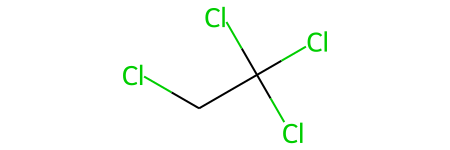

IUPAC: 1,1,1-Trichloroethane
SMILES: CC(Cl)(Cl)Cl

     RDKit          2D

  5  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981    1.5000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    2.0490   -0.5490    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.5490    2.0490    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  2  5  1  0
M  END



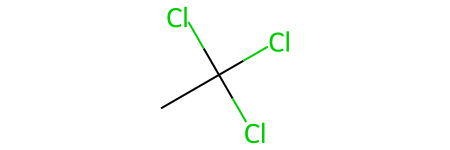

IUPAC: 1,1,2,2-Tetrachloroethane
SMILES: ClC(Cl)C(Cl)Cl

     RDKit          2D

  6  5  0  0  0  0  0  0  0  0999 V2000
   -1.2990    0.7500    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.5000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    0.7500    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5981   -0.0000    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
    1.2990    2.2500    0.0000 Cl  0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  2  4  1  0
  4  5  1  0
  4  6  1  0
M  END



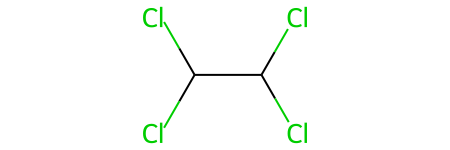

In [54]:
sample_molecules = molecules[0:3]
for i, mol in enumerate(sample_molecules):
    print("IUPAC:", sol_data['iupac'][i])
    print("SMILES:", sol_data['SMILES'][i])
    print(Chem.MolToMolBlock(mol))
    display(mol)

In [51]:
def get_predictors(mol):
    molecular_weight = Descriptors.MolWt(mol)
    oct_water_partition_coefficient = Descriptors.MolLogP(mol)
    num_rotatable_bonds = Descriptors.NumRotatableBonds(mol)
    aromatic_proportion = get_aromatic_proportion(mol)
    
    entry = {
        'MW': molecular_weight,
        'cLogP': oct_water_partition_coefficient,
        'RB': num_rotatable_bonds,
        'AP': aromatic_proportion
    }
    return entry

def get_aromatic_proportion(mol):
    are_aromatic = [mol.GetAtomWithIdx(i).GetIsAromatic() for i in range(mol.GetNumAtoms())]
    return sum(are_aromatic) / len(are_aromatic)

entries = [get_predictors(mol) for mol in molecules]

pd.DataFrame(entries, columns=['MW', 'cLogP', 'RB', 'AP'])

,MW,cLogP,RB,AP
0,167.850,2.59540,0,0.000000
1,133.405,2.37650,0,0.000000
2,167.850,2.59380,1,0.000000
3,133.405,2.02890,1,0.000000
4,187.375,2.91890,1,0.000000
...,...,...,...,...
1139,287.343,1.98820,8,0.000000
1140,286.114,3.42130,2,0.333333
1141,308.333,3.60960,4,0.695652
1142,354.815,2.56214,3,0.521739


### Calculating Predictors
- cLogP (Octanol-water partition coefficient)
- MW (molecular weight)
- RB (number of rotatable bonds)
- AP (Aromatic proportion = number of aromatic atoms / number of heavy atoms)